In [1]:
import pandas as pd

wine = pd.read_csv("./wine.csv", index_col=0)

In [3]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [6]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state = 13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7294593034442948
Test Acc:  0.7161538461538461


#### KFold 적용

In [7]:
### KFold 적용

from sklearn.model_selection import KFold

### kfold 함수는 5개로 나눠줌
kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)


In [9]:
### KFold는 index를 반환한다
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [10]:
# train/test data 분리
kfold.split(X)

<generator object _BaseKFold.split at 0x0000026DF8749348>

In [13]:
### 각각의 fold에 대한 학습 후 acc
### X.iloc[train_idx]

cv_accuracy = []

### 5개 나눠주는 반복코드
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [14]:
### 각 acc의 분산이 크지 않다면 평균을 대표값으로 한다
np.mean(cv_accuracy)

0.709578255462782

#### StratifiedKFold

In [15]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
wine_tree_csv = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy = []

for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy 

[0.5523076923076923,
 0.6884615384615385,
 0.7143956889915319,
 0.7321016166281755,
 0.7567359507313318]

In [16]:
np.mean(cv_accuracy)
# stratifiedKFold의 acc 평균이 더 나쁘다

0.6888004974240539

In [17]:
# 보다 간편히 cross validation
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [18]:
# max depth 2 -> 5 : 무조건 acc가 좋아지는 건 아니다

wine_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold)

array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772])

In [19]:
# train score와 함께 보고 싶을 때
# train_score > test_score: 과적합
from sklearn.model_selection import cross_validate

cross_validate(wine_tree_cv, X, y, scoring=None, cv=skfold, return_train_score=True)

{'fit_time': array([0.01990819, 0.02525973, 0.03502727, 0.03330684, 0.03293633]),
 'score_time': array([0.00299454, 0.00555229, 0.        , 0.        , 0.        ]),
 'test_score': array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772]),
 'train_score': array([0.78795459, 0.78045026, 0.77568295, 0.76356291, 0.76279338])}

### HiperParameter Tuning

In [21]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [22]:
### GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 3, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params)
gridsearch.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 3, 7, 10]})

In [25]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.02036643, 0.01241541, 0.05253882, 0.0653482 ]),
    'mean_score_time': array([0.0053318 , 0.0024848 , 0.00327158, 0.00682721]),
    'mean_test_score': array([0.6888005 , 0.69203127, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 3, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 3},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([2, 1, 3, 4]),
    'split0_test_score': array([0.55230769, 0.56846154, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.68846154, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.71439569, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.75673595, 0.73518091, 0.72517321]),
    'std

In [26]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=13)

In [27]:
gridsearch.best_score_

0.6920312666548233

In [29]:
gridsearch.best_params_

{'max_depth': 3}

In [30]:
# pipeline 적용

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
             ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [31]:
param_grid = [{'clf__max_depth': [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [32]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [33]:
# best score 확인
GridSearch.best_score_

0.6888004974240539

In [35]:
GridSearch.cv_results_

{'mean_fit_time': array([0.02727475, 0.04631233, 0.05809565, 0.08809171]),
 'std_fit_time': array([0.00593096, 0.00890429, 0.00337698, 0.01061822]),
 'mean_score_time': array([0.00984745, 0.0084506 , 0.00413117, 0.0052763 ]),
 'std_score_time': array([0.00238031, 0.00046655, 0.00308124, 0.00287999]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
 'split1_test_score': array([0.68846154, 0.63153846, 0.60461538, 0.60230769]),
 'split2_test_score': array([0.71439569, 0.72363356, 0.68206313, 0.66589684]),
 'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
 'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
 'mean_test_score': array([0.688

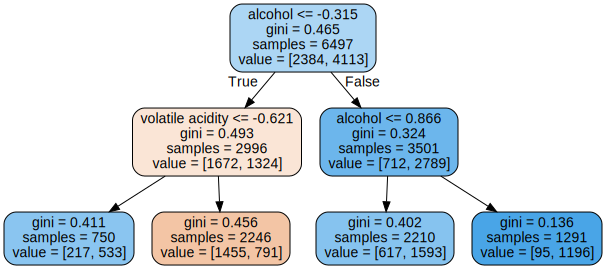

In [36]:
# tree 확인

from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(GridSearch.best_estimator_['clf'],
                      feature_names=X.columns,
                      rounded=True, filled=True))

In [37]:
# 표로 정리

import pandas as pd

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 10},4,0.644016,0.076915
